In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "/content/drive/MyDrive/IMDb Movies India.csv/IMDb Movies India.csv"
df = pd.read_csv(file_path, encoding="latin1")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
display(df.head())

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.dropna(subset=["Rating"], inplace=True)

In [7]:
df["Year"] = df["Year"].str.extract("(\\d+)").astype(float)
df["Duration"] = df["Duration"].str.extract("(\\d+)").astype(float)
df["Votes"] = df["Votes"].replace(",", "", regex=True).astype(float)

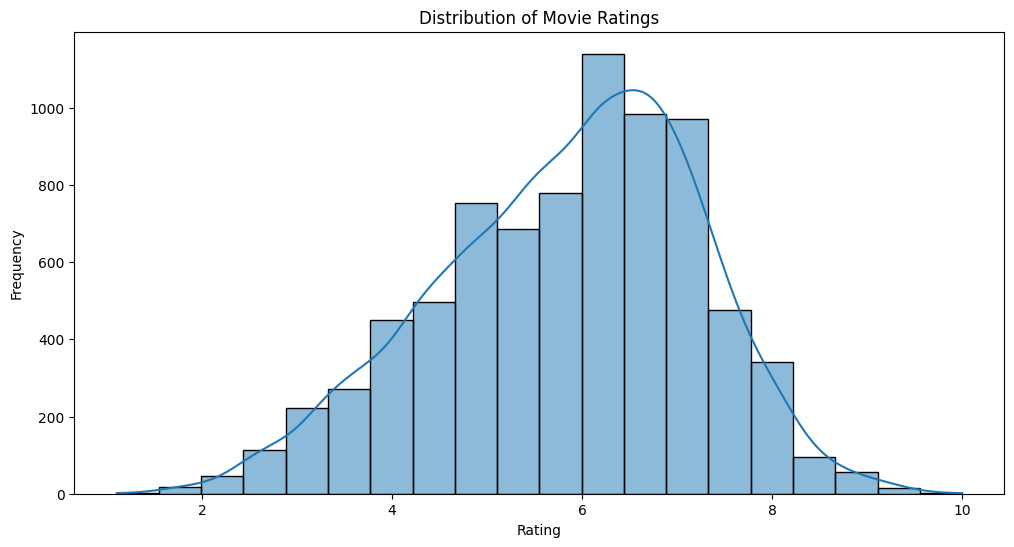

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

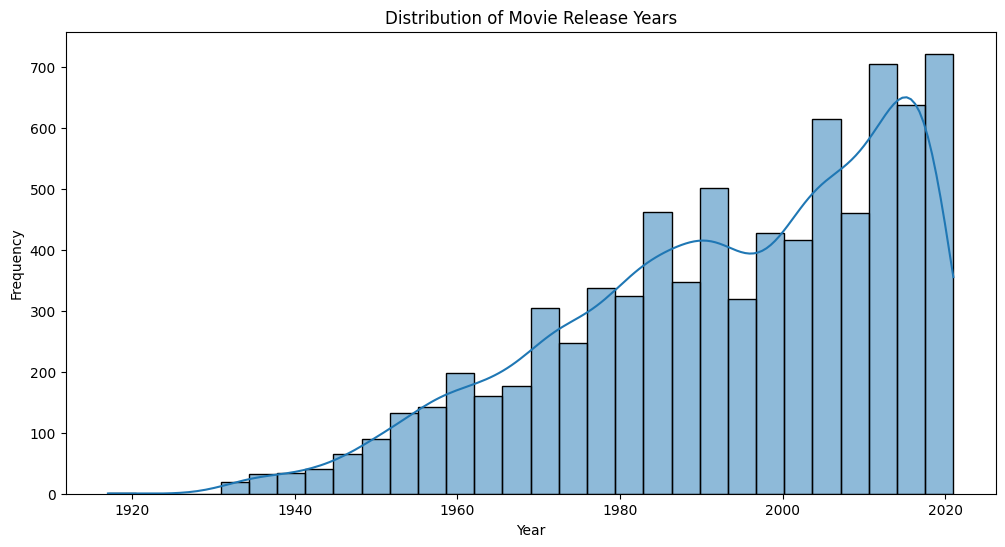

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Year"].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Release Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

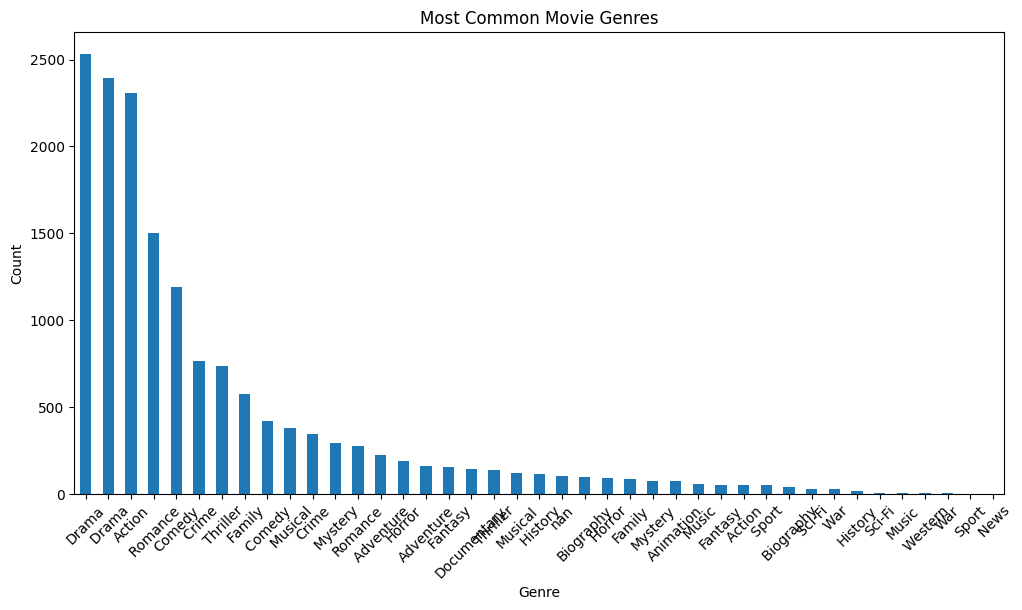

In [10]:
df["Genre"] = df["Genre"].astype(str)
genres = df["Genre"].str.get_dummies(sep=",")
genre_counts = genres.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_counts.plot(kind="bar")
plt.title("Most Common Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

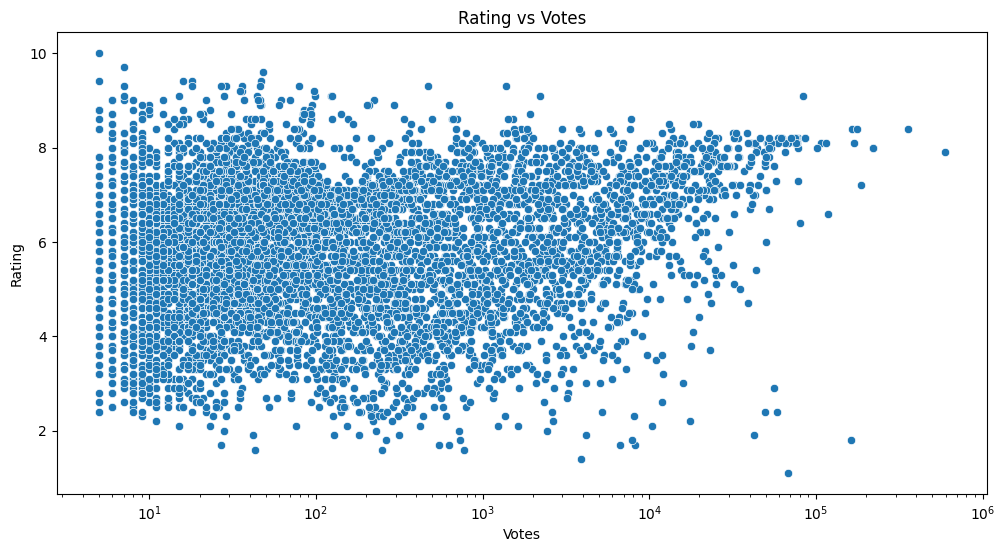

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Votes"], y=df["Rating"])
plt.title("Rating vs Votes")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.xscale("log")
plt.show()

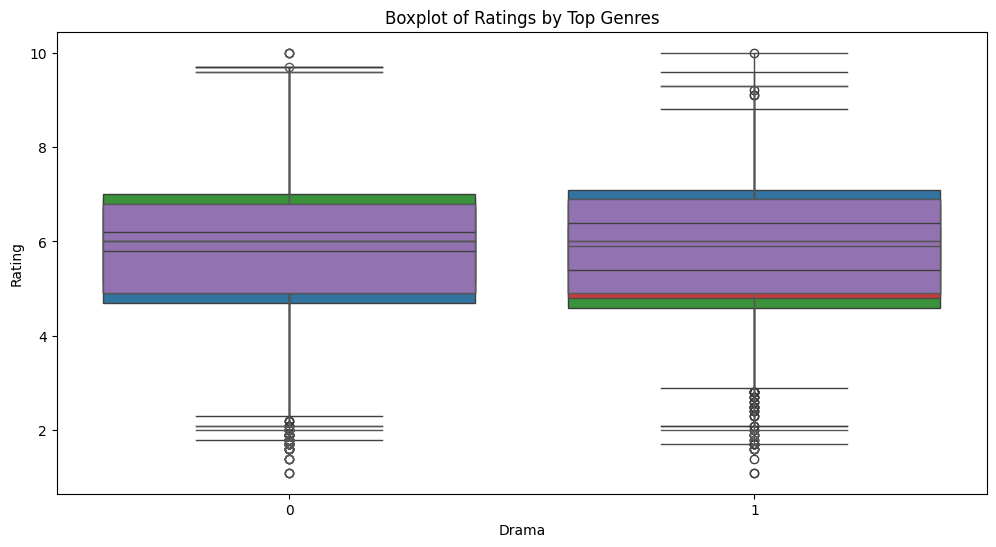

In [12]:
top_genres = genre_counts.index[:5]
plt.figure(figsize=(12, 6))
for genre in top_genres:
    sns.boxplot(x=genres[genre], y=df["Rating"])
plt.title("Boxplot of Ratings by Top Genres")
plt.ylabel("Rating")
plt.show()

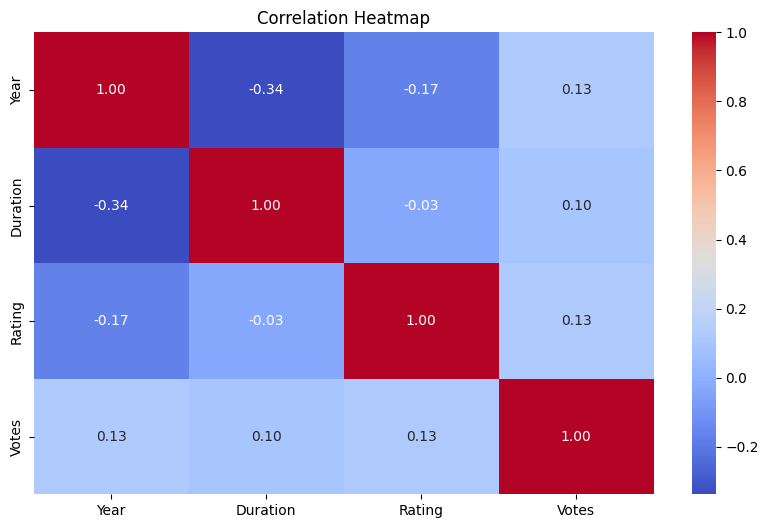

In [13]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
